# Ex ante vs. interrim maximization 

Recall that we have the distinction in timing: 
* **Ex ante:** Before the game
* **Interrim:** Player types are revealed but no actions have yet been taken. 
* **Ex post:** After actions have been taken, when payoffs are realized. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

plt.rcParams.update({"text.usetex": False, 'font.size':14})
np.random.seed(1337)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Ex Ante Maximization

Bidding function in a linear family of functions, $b(v) = cv$. 

In [13]:
def b(v, c): 
    bid = c*v + 1/2 # FILL OUT 
    return  bid 

Ex ante utility is 
$$
    \mathbb{E}_{v_1,v_2}[u_1(b_1(v_1),b_2(v_2))] 
= 
    \frac1R \sum_{r=1}^R u_1(b_1(v_1^{(r)}),b_2(v_2^{(r)}))
$$

where $\{v_1^{(r)}, v_2^{(r)}\}_{r=1}^R$ is a sequence of draws. 

In [14]:
def Eu1_exante(b1,b2,v1): 
    '''
    Inputs: 
        b1,b2: (R,) vectors of bids 
        v1: (R,) vector of valuations 
    Returns:
        Eu1: float, expected utility of bidder 1
    '''
    u1 = (b1 > b2) * (v1 - b1) 
    return np.mean(u1)

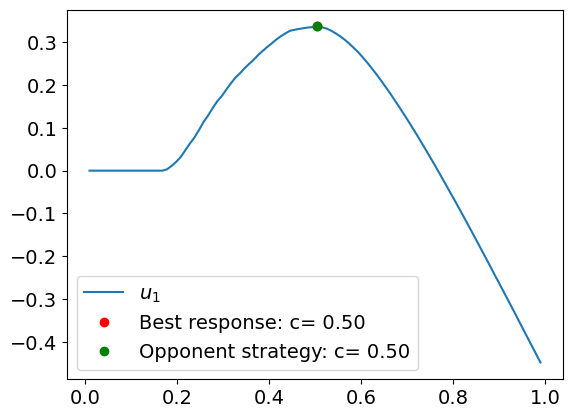

In [16]:
R = 10_000 # simulations, to compute expectations by simulated average
N = 2 # 2 players 

# draw both valuations 
v1 = np.random.uniform(1,3,(R,))
v2 = np.random.uniform(1,3,(R,))

# compute bid for player 2 given the proposed strategy
c = 0.5 # fixing opponent's strategy to this family of funcitons 
b2 = b(v2, c) # (R,) vector of bids

# possible values of slope coefficient in strategy 
cc = np.linspace(0.01, 0.99, 100) # all the values of c we want to try out
u1s = np.empty(cc.shape)
for i,c_ in enumerate(cc): 
    b1 = b(v1, c_) # optimal bid for player 1 given c_
    u1s[i] = Eu1_exante(b1, b2, v1) # Compute utility for player 1 given b1 (scalar) and b2 (vector)


# primary plot 
plt.plot(cc, u1s, '-', color=colors[0], label='$u_1$')

# add the optima 
I = np.argmax(u1s)
plt.plot(cc[I], u1s[I], 'or', label=f'Best response: c={cc[I]:5.2f}')
J = np.argmin(np.abs(cc - c))
plt.plot(cc[J], u1s[J], 'og', label=f'Opponent strategy: c={c:5.2f}')
plt.legend(); # show the plot legend 


# Interrim maximization 

Maximizing expected utility *conditional* on own type. That is, we are solving: 
$$ b^*(v_i) = \arg \max_b \mathbb{E}(u_i(b, b_{-1}; v_i)) $$
There is one of these maximization problems for each realization of $v_i$, and each time we can freely choose $b_i \in [1;3]$, although we quickly realize that only $b_i \in [1;v_i]$ would ever make sense. 

In [17]:
def Eu1_interim(b1,b2,v1):
    u1 = (b1 > b2) * (v1 - b1)
    return np.mean(u1)  


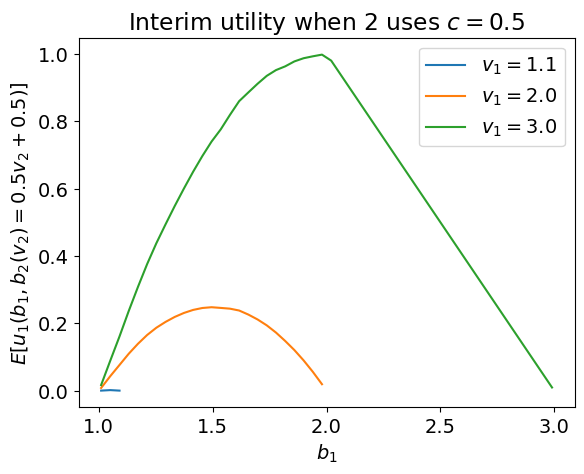

In [19]:
c = 0.5
v2 = np.random.uniform(1,3,(R,)) # draw opponent valuations
b2 = b(v2, c) # (R,) vector of opponent bids

bb = np.linspace(0,4,100) # grid of possible own actions (bids) 
Eu1 = np.zeros_like(bb)

for v1 in np.array([1.1,2,3]): 
    for i,b1 in enumerate(bb):
        Eu1[i] = Eu1_interim(b1, b2, v1)

    Eu1[Eu1 <= 0] = np.nan # delete dominated bids from graph if negative to avoid annoying axis 

    # add to plot 
    plt.plot(bb, Eu1, '-', label=f'$v_1={v1:4.1f}$')

plt.legend(); plt.xlabel('$b_1$');  
plt.ylabel(f'$E[u_1(b_1, b_2(v_2) = 0.5v_2 + 0.5)]$'); plt.title(f'Interim utility when 2 uses $c={c}$'); 
#plt.savefig('img/interim.pdf')